In [ ]:
#nomor1
import pandas as pd
import numpy as np
from pathlib import Path
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length','sepal_width','petal_length','petal_width','species']

df = pd.read_csv(url, header=None, names=column_names)
data_array = df.to_numpy()
print(data_array)
print(df.head())

[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [5.8 4.0 1.2 0.2 'Iris-setosa']
 [5.7 4.4 1.5 0.4 'Iris-setosa']
 [5.4 3.9 1.3 0.4 'Iris-setosa']
 [5.1 3.5 1.4 0.3 'Iris-setosa']
 [5.7 3.8 1.7 0.3 'Iris-setosa']
 [5.1 3.8 1.5 0.3 'Iris-setosa']
 [5.4 3.4 1.7 0.2 'Iris-setosa']
 [5.1 3.7 1.5 0.4 'Iris-setosa']
 [4.6 3.6 1.0 0.2 'Iris-setosa']
 [5.1 3.3 1.7 0.5 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [5.0 3.4 1.6 0.4 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [4.8 3.1 

# Bagian Baru

In [ ]:
print("Shape dari dataset:", data_array.shape)
print("Size dari dataset:", data_array.size)

Shape dari dataset: (3, 2)
Size dari dataset: 6


In [ ]:
setosa = df[df['species'] == 'Iris-setosa']
versicolor = df[df['species'] == 'Iris-versicolor']
virginica = df[df['species'] == 'Iriss-virginica']



In [ ]:
setosa.to_csv('setosa.csv', index=False)
versicolor.to_csv('versicolor.csv', index=False)
virginica.to_csv('virginica.csv', index=False)

In [ ]:
import numpy as np
np.save('setosa.npy', setosa.to_numpy)
np.save('versicolor.npy', versicolor.to_numpy)
np.save('virginica.npy', virginica.to_numpy)

# Bagian Baru

In [ ]:
np.savez(
    'iris.npz',
    setosa = setosa.to_numpy,
    versicolor = versicolor.to_numpy,
    virginica =  virginica.to_numpy,
)

In [ ]:
print("Shape dari dataset:", data_array.shape)
print("Size dari dataset:", data_array.size)

Shape dari dataset: (150, 5)
Size dari dataset: 750


In [ ]:
namasentosa1=Path('setosa.csv').stat().st_size
namaversicolor2=Path('versicolor.csv').stat().st_size
namavirginica3=Path('virginica.csv').stat().st_size

print(namasentosa1)
print(namaversicolor2)
print(namavirginica3)

1458
1658
58


#nomor2
a. ada 3 kelas bungan
b. iya berdasarkan kelasnya
c. 750

nomor2
a.format virginica
b.karna hasilnya menunjukan yang terkecil

<ipython-input-1-9f48572f1bda>:81: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


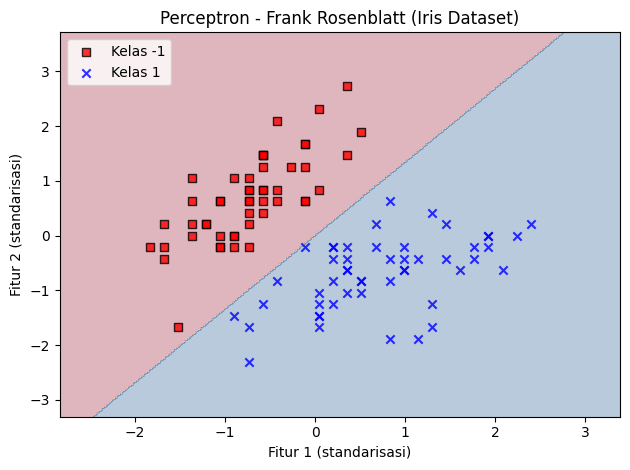

In [1]:
# Percobaan3_12345678 - Perceptron Frank Rosenblatt (Iris Dataset)

# Langkah 1: Import Library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Langkah 2: Load dan Persiapkan Data
iris = load_iris()
X = iris.data
y = iris.target

# Pilih dua kelas pertama: Setosa (0) dan Versicolor (1)
X = X[y != 2]
y = y[y != 2]

# Ambil dua fitur pertama
X = X[:, :2]

# Ubah label ke -1 dan 1
y = np.where(y == 0, -1, 1)

# Standarisasi
sc = StandardScaler()
X_std = sc.fit_transform(X)

# Split train dan test
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=1)

# Langkah 3: Buat Kelas Perceptron
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Langkah 4: Latih Model
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_train, y_train)

# Langkah 5: Plot Decision Boundary
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = plt.cm.RdBu

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Kelas {cl}',
                    edgecolor='black')

# Plot
plot_decision_regions(X_std, y, classifier=ppn)
plt.xlabel('Fitur 1 (standarisasi)')
plt.ylabel('Fitur 2 (standarisasi)')
plt.title('Perceptron - Frank Rosenblatt (Iris Dataset)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Langkah 6: Simpan data (opsional)
np.savez("Percobaan3_12345678.npz", X=X_std, y=y)